### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

 Objective is try/ implement the techniques learnt on Pandas (Groupby and Merg ) , Vizualization and EDS techniques.


**Note that the project will need you to apply the concepts of groupby and merging extensively.**

## 1. Import the necessary packages - 2.5 marks

In [1]:
# Importing the toolbox needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as wg
from ipywidgets import interact, interact_manual
import re


In [2]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',200)

## 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
Data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

In [4]:
# checking the read funtion, trying to See wt's in the data frame
Data.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [5]:
item.tail(5)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1680,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


##  3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [7]:
print('Data.CSV Dataframe Info & Shape is')
print('##################################')
Data.info()

Data.CSV Dataframe Info & Shape is
##################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
Data.shape

(100000, 4)

In [9]:
print('item.CSV Dataframe Info & Shape is')
print('##################################')
item.info()

item.CSV Dataframe Info & Shape is
##################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 n

In [10]:
item.shape

(1681, 22)

In [11]:
print('user.CSV Dataframe Info & Shape is')
print('##################################')
user.info

user.CSV Dataframe Info & Shape is
##################################


<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator     2215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [12]:
# missing values in Data.csv

Data.isnull().sum()


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [13]:
# missing values in item.csv

item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [14]:
#Missing Values in user.csv

user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [15]:
# item.csv data file has all Genre Needed data

# method 1: finding sum over index axis default 
item.sum (axis = 0, skipna = True )


movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [16]:
# method 2 : creating new DF method, here tried to convert existing df columns into new data frame and calculating the sum
print('  #############  Genere Sum ################ ')
print()
df = pd.DataFrame(item,columns=['unknown','Action','Adventure','Animation','Childrens','Comedy',
                                'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
                                 'Mystery','Romance','Sci-Fi','Thriller','War','Western'])
sum_column = df.sum(axis=0)
print (sum_column)



  #############  Genere Sum ################ 

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

In [17]:
#hint: use sum on the axis = 1
df1= item.drop(['movie id','release date'], axis=1)
genre_more_one = df1.sum(axis=1)
print(df1[genre_more_one>=1])


                              movie title  unknown  Action  Adventure  \
0                              Toy Story         0       0          0   
1                              GoldenEye         0       1          1   
2                             Four Rooms         0       0          0   
3                             Get Shorty         0       1          0   
4                                Copycat         0       0          0   
...                                   ...      ...     ...        ...   
1676                          Mat' i syn         0       0          0   
1677                           B. Monkey         0       0          0   
1678                       Sliding Doors         0       0          0   
1679                        You So Crazy         0       0          0   
1680  Scream of Stone (Schrei aus Stein)         0       0          0   

      Animation  Childrens  Comedy  Crime  Documentary  Drama  Fantasy  \
0             1          1       1      0        

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [18]:
#groupby to identify the movie
df2= item.groupby('movie title').sum().loc[lambda x: x['unknown']>=1]
print(df2)

# on Actual item.csv file to drop on index, dummpy data frame so not to alter item.csv dataframe

df3=df2.drop(df2.index)
df3



               movie id  unknown  Action  Adventure  Animation  Childrens  \
movie title                                                                 
Good Morning       1373        1       0          0          0          0   

               Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  \
movie title                                                                    
Good Morning        0      0            0      0        0          0       0   

               Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
movie title                                                               
Good Morning         0        0        0       0         0    0        0  


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie title,,,,,,,,,,,,,,,,,,,,


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [19]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [20]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])


brown
brown


In [21]:
## Univariate plots : definin
user.head(10)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,5201
8,9,29,M,student,1002
9,10,53,M,lawyer,90703


In [22]:
Data.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [23]:
# merged the user.csv and the data.csv to see the impression,

df_user_data=pd.merge(Data,user,how='outer',on='user id')
print(df_user_data)

       user id  movie id  rating  timestamp  age gender occupation zip code
0          196       242       3  881250949   49      M     writer    55105
1          196       393       4  881251863   49      M     writer    55105
2          196       381       4  881251728   49      M     writer    55105
3          196       251       3  881251274   49      M     writer    55105
4          196       655       5  881251793   49      M     writer    55105
...        ...       ...     ...        ...  ...    ...        ...      ...
99995      941       919       5  875048887   20      M    student    97229
99996      941       273       3  875049038   20      M    student    97229
99997      941         1       5  875049144   20      M    student    97229
99998      941       294       4  875048532   20      M    student    97229
99999      941      1007       4  875049077   20      M    student    97229

[100000 rows x 8 columns]


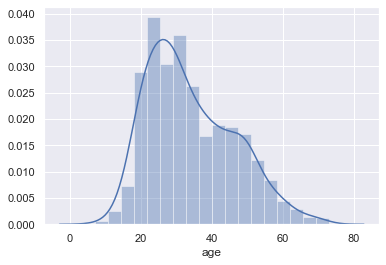

In [24]:
#the disribution to show the age group of people by useing the user.csv parent file.
sns.set(color_codes=True)
sns.distplot(user['age'])

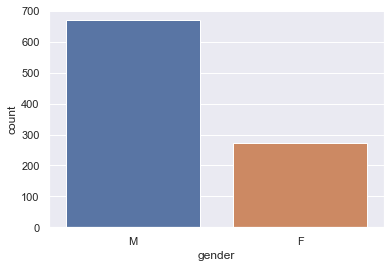

In [25]:
sns.countplot(x="gender", data=user)

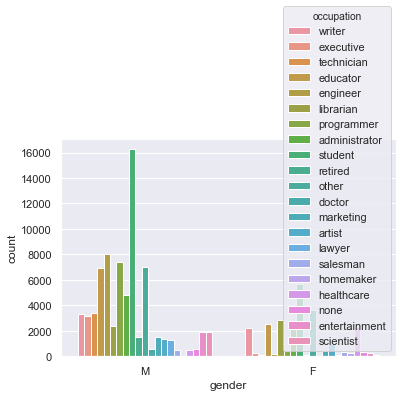

In [26]:
# this is to find which occupational gender is have more users
sns.countplot(df_user_data['gender'],hue=df_user_data['occupation'])

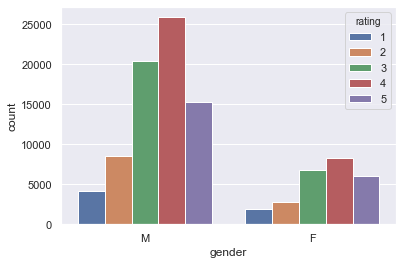

In [27]:
# To find which gender is satified with the content of the movies.
sns.countplot(df_user_data['gender'],hue=df_user_data['rating'])

In [28]:
# Male : occupation v/s age
gender_group = user.groupby("gender")
group_male=gender_group.get_group("M")
print(group_male)

     user id  age gender     occupation zip code
0          1   24      M     technician    85711
2          3   23      M         writer    32067
3          4   24      M     technician    43537
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
..       ...  ...    ...            ...      ...
935      936   24      M          other    32789
936      937   48      M       educator    98072
939      940   32      M  administrator     2215
940      941   20      M        student    97229
942      943   22      M        student    77841

[670 rows x 5 columns]


In [29]:
# female: occupation v/s Age
gender_group = user.groupby("gender")
group_female=gender_group.get_group("F")
print(group_female)

     user id  age gender  occupation zip code
1          2   53      F       other    94043
4          5   33      F       other    15213
10        11   39      F       other    30329
11        12   28      F       other     6405
14        15   49      F    educator    97301
..       ...  ...    ...         ...      ...
924      925   18      F    salesman    49036
929      930   28      F   scientist     7310
937      938   38      F  technician    55038
938      939   26      F     student    33319
941      942   48      F   librarian    78209

[273 rows x 5 columns]


In [30]:
# trying to extract release year

item.head(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# to extract date from the release column

release_date_list= item['release date'].to_list()

new_list = [int(i.split('-')[2]) for i in release_date_list]
new_only_release_year=pd.DataFrame(new_list)
new_only_release_year.columns = ['release Year']
new_only_release_year


,release Year
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
1676,1998
1677,1998
1678,1998
1679,1994


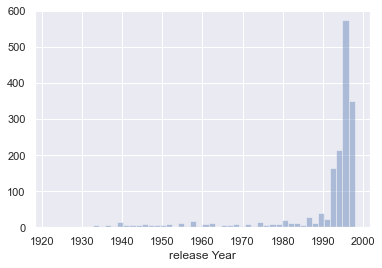

In [32]:
# to which release year had more number of movies
sns.distplot(new_only_release_year['release Year'],kde=False)

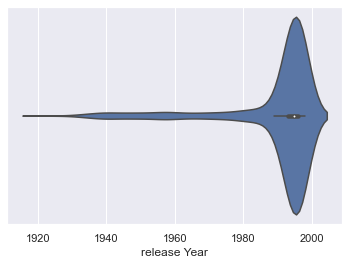

In [33]:
ax=sns.violinplot(x=new_only_release_year['release Year'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [136]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [154]:
drop_release_date = item.drop(['release date','unknown'], axis=1)
new_item= drop_release_date.join(new_only_release_year, lsuffix='_caller', rsuffix='_other')


In [153]:
# Pivot Table to sum

table = pd.pivot_table(new_item, values=['Action','Adventure','Animation','Childrens','Comedy',
                                'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
                                 'Mystery','Romance','Sci-Fi','Thriller','War','Western'], index=['release Year'],aggfunc=np.sum)
Heat_df=pd.DataFrame(data=table)
Heat_df 

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release Year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1933,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1934,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
1935,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,1,0,0
1936,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


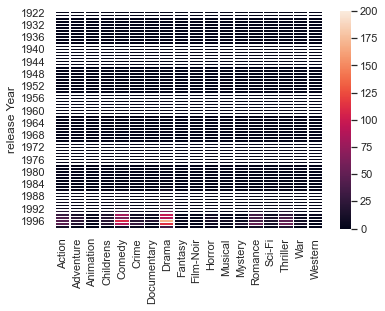

In [155]:
#heat map 
sns.set()
ax = sns.heatmap(Heat_df,linewidths=.5,vmin=0, vmax=200)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [121]:
# Merge operation and data frame creation to address above Q&A

drop_merge=pd.merge(item,Data,how='right',on='movie id')
top_dummy_data = drop_merge.drop(['release date','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','timestamp'], axis=1)
top_dummy_data.head(3)

,movie id,movie title,user id,rating
0,1,Toy Story,308,4
1,1,Toy Story,287,5
2,1,Toy Story,148,4


In [123]:
# groupby to extarct list, needed condition
df_rate=top_dummy_data.groupby("movie title")["rating"].count()

# movies list that have more than 100 ratings
print(df_rate[df_rate>=100])


movie title
101 Dalmatians                            109
12 Angry Men                              125
2001: A Space Odyssey                     259
Absolute Power                            127
Abyss, The                                151
                                         ... 
Willy Wonka and the Chocolate Factory     326
Wizard of Oz, The                         246
Wrong Trousers, The                       118
Young Frankenstein                        200
Young Guns                                101
Name: rating, Length: 338, dtype: int64


In [124]:
# top 25 movies in  descending order
movies_rating = pd.pivot_table(top_dummy_data, values=['rating'], index=['movie title'],aggfunc=np.sum)
movies_rating_df=pd.DataFrame(data=movies_rating)
top_25_movies_df = movies_rating_df.sort_values(by='rating', ascending=False)
top_25_movies_df.head(25)

,rating
movie title,
Star Wars,2541
Fargo,2111
Return of the Jedi,2032
Contact,1936
Raiders of the Lost Ark,1786
"Godfather, The",1769
"English Patient, The",1759
Toy Story,1753
"Silence of the Lambs, The",1673


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [42]:
# merge all data sets.
merge1_df =pd.merge(Data,user,how='inner',on='user id')
Total_merge_df=pd.merge(item,merge1_df,how='inner',on='movie id')
# eleminate columns not needed for % calculation
Total_percent_DF = Total_merge_df.drop(['release date','unknown','timestamp','occupation','zip code'], axis=1)
Total_percent_DF


,movie id,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,age,gender
0,1,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,244,4,28,M
1,1,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,298,5,44,M
2,1,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,253,5,26,F
3,1,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,305,5,23,M
4,1,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,42,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,1678,Mat' i syn,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,863,1,17,M
99987,1679,B. Monkey,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,863,3,17,M
99988,1680,Sliding Doors,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,863,2,17,M
99989,1681,You So Crazy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,896,3,28,M


In [48]:
x=Total_percent_DF['Drama'].sum(axis=0)
y=Total_percent_DF['Sci-Fi'].sum(axis=0)
z=Total_percent_DF['Romance'].sum(axis=0)

print('Total sum of drama viewers :',  x)
print('Total sum of Sci-Fi viewers :',  y)
print('Total sum of Romance viewers :', z)

# group by gender to calculate accross the geners
grp1 = Total_percent_DF.groupby(['gender']) 
grp1.aggregate(np.sum) 

Total sum of drama viewers : 39895
Total sum of Sci-Fi viewers : 12730
Total sum of Romance viewers : 19461


,movie id,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,age
gender,,,,,,,,,,,,,,,,,,,,,,
F,11452645,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,12225832,90894,831719
M,31097965,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,34019836,262061,2465018


In [111]:
def per(a, b):
     return round (((a/b)*100),2) 
    

In [112]:
#Drama viewrs
fd=11008
md=28887
print(per(a=md,b=x),'percentage Men View Drama')
print(per(a=fd,b=x),'percentage women View Drama')


72.41 percentage Men View Drama
27.59 percentage women View Drama


In [126]:
# Sci-Fi viewers
fs=2629
ms=10101
print(per(a=ms,b=y),'percentage Men View Sci-Fi')
print(per(a=fs,b=y),'percentage women View Sci-Fi')

79.35 percentage Men View Sci-Fi
20.65 percentage women View Sci-Fi


In [127]:
# Romance viewers
fr=5858
mr=13603
print(per(a=mr,b=z),'percentage Men View Romance')
print(per(a=fr,b=z),'percentage women View Romance')

69.9 percentage Men View Romance
30.1 percentage women View Romance


#### Conclusion:



In [117]:
print((md-fd),'More Men watch more drama than women')

17879 More Men watch more drama than women


In [118]:
print((ms-fs),'More Men watch more Sci-Fi than women')

7472 More Men watch more Sci-Fi than women


In [120]:
print((mr-fr),'More Men watch more Romance than women')

7745 More Men watch more Romance than women
